In [19]:
options(warn = -1)
suppressWarnings({
    libs <- c("tidyverse", "gridExtra")
load.libs <- function(x){
  for(i in x){
    if(!require(i,character.only = TRUE )){
      install.packages(i,dependencies = TRUE )
      library(i,character.only = TRUE )
    }
  }
}
load.libs(libs)
})

In [2]:
data_unstructured<-read.csv("data/data2016_coded.csv")

relevant_info<-c("Q1.a", "Q1.b", "Q1.c", "Q1.d", "Q1.e", "Q1.f", "Q1.g", "Q1.h", 
                 "Q1.1", "Q1.2", "Q2.a", "Q2.b", "Q2.c", "Q2.d", "Q2.e", "Q2.f", 
                 "Q3.a", "Q3.b", "Q3.c", "Q3.d", "Q3.e", "Q3.f", "Q3.g", "Q3.h", 
                 "Q3.i", "Q3.j", "Q3.k", "Q3.l", "Q3.m", "Q3.n", "Q3.o", 
                 "DormBuilding", "Level")

data<-data_unstructured%>%
    filter(Level %in% c("Freshman", "Sophomore", "Junior", "Senior"))%>% #7
    select(all_of(relevant_info))%>%
    mutate(On_Campus = as.factor(ifelse(DormBuilding == "No Dorm", 0, 1)),
           Level = as.factor(Level),
           Upper_Classman = as.factor(ifelse(Level %in% c("Freshman", "Sophomore"), 0, 1)))%>%
    select(-c("DormBuilding", "Level"))

data<-data[complete.cases(data),]

516 undergraduate students were surveyed in OSI's 2016 Sustainability Literacy Assessment, 466 of whom remain for analysis following pre-processing. The survey collected information on students’ sustainability-related behaviors and values, as well as on their overall knowledge of sustainability issues. Students rated 10 sustainability-related behaviors on a 7-point scale (Q1.a -- Q1.h, Q1.1, Q1.2) based on how often they act in such ways, with 1 being “never” and 7 being “always.” Similarly, their personal values regarding sustainability are captured by how much they align with six statements on a 7-point scale (Q2.a -- Q2.f). The specific questions of the survey can be found in Appendix A. In that regard, students also provided their class year and place of residence. Underclassmen, namely first and second-year students, are required to live on-campus barring special circumstances. As such, only two underclassmen in the data live off-campus as shown in Table 1. The number of underclassmen and upperclassmen is approximately uniform, albeit 82\% of all respondents (386 out of 466) live on-campus. 

In [4]:
#table 1
table(data[, "On_Campus"], data[, "Upper_Classman"])

   
      0   1
  0   2  78
  1 230 156

Having spent more time at Emory compared to underclassmen, upperclassmen have had more opportunities to engage in sustainability initiatives on campus regardless of where they live. Upperclassmen should report higher increases in sustainable behavior (Q1.1) and awareness of social justice (Q1.2) since beginning their studies. The average ratings of Q1.1 and Q1.2 among the two groups are found in Table 2, along with corresponding two-sample t-tests to evaluate their statistical significance at the 0.05 significance level. Among underclassmen, the mean Q1.1 and Q1.2 ratings are 3.16 and 3.76, respectively. Upperclassmen only reported marginally higher averages for both Q1.1 and Q1.2, contrary to expectations. The difference in overall sustainable behavior and social justice awareness between the two cohorts of students is not statistically significant. Their levels of sustainability are not necessarily equal: upperclassmen who live off-campus forego certain sustainable behaviors because they have less access to campus resources. 

In [5]:
#table 2
data%>%
    group_by(Upper_Classman)%>%
    summarise(mean_Q1.1 = mean(Q1.1),
              mean_Q1.2 = mean(Q1.2))

Upper_Classman,mean_Q1.1,mean_Q1.2
0,3.155172,3.762931
1,3.252137,3.837607


In [6]:
t.test(Q1.1 ~ Upper_Classman, data)
t.test(Q1.2 ~ Upper_Classman, data)


	Welch Two Sample t-test

data:  Q1.1 by Upper_Classman
t = -0.94591, df = 459.47, p-value = 0.3447
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2984081  0.1044795
sample estimates:
mean in group 0 mean in group 1 
       3.155172        3.252137 



	Welch Two Sample t-test

data:  Q1.2 by Upper_Classman
t = -0.69426, df = 461.94, p-value = 0.4879
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2860457  0.1366941
sample estimates:
mean in group 0 mean in group 1 
       3.762931        3.837607 


Consider the use of lower-impact transportation (Q1.d) among upperclassmen based on their place of residence. Compared to the number of upperclassmen in the data who live off-campus, there are twice as many on-campus upperclassmen at 156. 50\% of on-campus upperclassmen rated their use of lower-impact transportation as 5 or greater, while the median Q1.d rating of off-campus upperclassmen is only 4. At the 0.05 significance level, the difference in median ratings is statistically significant in the Wilcoxon rank sum test. Off-campus housing has a significant effect on the frequency that upperclassmen use lower-impact transportation. Beyond transportation costs, off-campus students also take on more responsibility than on-campus students in making their own sustainable dietary choices.

In [7]:
#table 3
data%>%
    filter(Upper_Classman == 1)%>%
    group_by(On_Campus)%>%
    summarise(count = n(),
              mean_Q1.d = mean(Q1.d),
              median_Q1.d = median(Q1.d),
              sd_Q1.d = sd(Q1.d))

On_Campus,count,mean_Q1.d,median_Q1.d,sd_Q1.d
0,78,4.205128,4,1.804460
1,156,4.782051,5,1.682145


In [8]:
wilcox.test(Q1.d ~ On_Campus, data[data$Upper_Classman == 1,], alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  Q1.d by On_Campus
W = 4895.5, p-value = 0.01343
alternative hypothesis: true location shift is not equal to 0


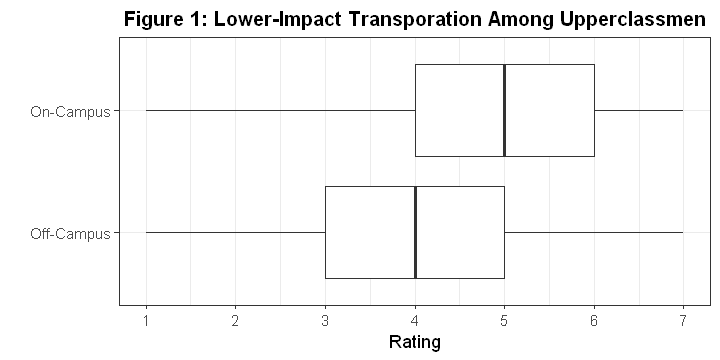

In [9]:
options(repr.plot.height = 3, repr.plot.width = 6)
data[data$Upper_Classman == 1,]%>%
    mutate(On_Campus = ifelse(On_Campus == 0, "Off-Campus", "On-Campus"))%>%
    ggplot()+
    geom_boxplot(aes(Q1.d, On_Campus))+
    scale_x_continuous(breaks = seq(1,7,1))+
    labs(title = "Figure 1: Lower-Impact Transporation Among Upperclassmen",
         x = "Rating",
         y = "")+
    theme_bw()+
    theme(plot.title = element_text(size = 12, hjust = 0.5, face = "bold"),
          axis.title.y = element_text(size = 10, face = "bold"))

Meal plans are completely voluntary for off-campus students, but they are required for on-campus students. The available options slightly vary by class year with upperclassmen typically having less restrictions. Holding all else constant, students with meal plans naturally have more incentive to make sustainable dietary choices (Q1.e). Although information on meal plan purchases is unavailable, the relationship between Q1.e and food options at Emory can be examined through three groups of students:

* on-campus underclassmen who \textit{must} purchase structured meal plans (Group 1)
* on-campus upperclassmen who \textit{can} purchase meal plans that are less structured than what are available to on-campus underclassmen (Group 2)
* off-campus upperclassmen for whom meal plans are optional (Group 3)

Note that dietary restrictions may cause on-campus students to have modified meal plans or be exempt from them altogether. It can be reasonably assumed that these special cases are independent of class year, so Groups 1 and 2 can be analysed independently in their tendencies to make sustainable dietary choices through meal plans. Suppose the average budget $\alpha$ for purchasing food is equal across the three groups. If $\theta_\text{I}$ is the average proportion of $\alpha$ that students in Group $I$ allocate to meal plans, we assume
$$\alpha\theta_{\text{3}} \leq \alpha\theta_{\text{2}} \leq \alpha\theta_{\text{1}}$$ 
such that the three groups are distinct in the context of meal plan purchases. Figure 2 shows the distribution of their Q1.e ratings:

In [10]:
options(repr.plot.height = 3, repr.plot.width = 6)
for(i in 1:nrow(data)){
    if(data[i,"On_Campus"] == 1 && data[i, "Upper_Classman"] == 0){
        data[i, "Group"] = "Group 1"
    }else if(data[i,"On_Campus"] == 1 && data[i, "Upper_Classman"] == 1){
        data[i, "Group"] = "Group 2"
    }else if(data[i,"On_Campus"] == 0 && data[i, "Upper_Classman"] == 1){
        data[i, "Group"] = "Group 3"
    }else{
        data[i, "Group"] = "na"
    }
}

In [22]:
index = data%>%
    filter(Group != "na")%>%
    droplevels()%>%
    group_by(Group)%>%
    summarise(count = n(),
              median_Q1.e = median(Q1.e),
              mean_Q1.e = mean(Q1.e),
              sd_Q1.e = sd(Q1.e))

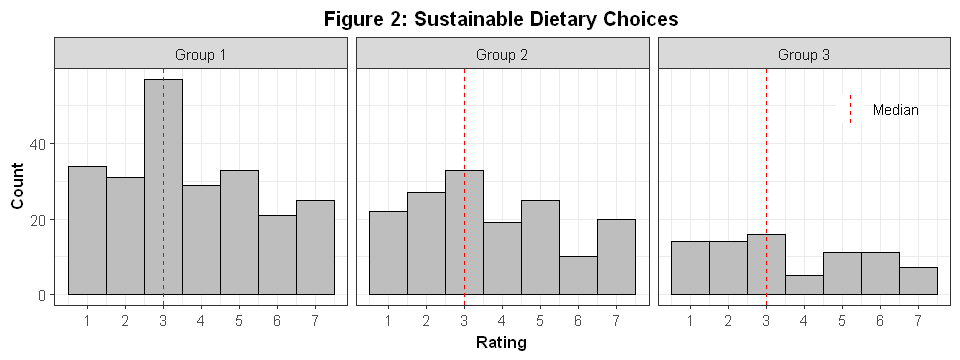

In [23]:
options(repr.plot.height = 3, repr.plot.width = 8)
data%>%
    filter(Group != "na")%>%
    droplevels()%>%
    ggplot()+
    geom_histogram(aes(Q1.e), fill = "grey", color = "black", bins = 7)+
    scale_x_continuous(breaks = seq(1,7,1))+
    geom_vline(data = index, aes(xintercept = median_Q1.e, color = "Median"), linetype = "dashed")+
    scale_color_manual(values = c("Median" = "red"))+
    labs(title = "Figure 2: Sustainable Dietary Choices",
         x = "Rating",
         y = "Count")+
    facet_wrap(~Group)+
    theme_bw()+
    theme(plot.title = element_text(size = 12, hjust = 0.5, face = "bold"),
          axis.title = element_text(size = 10, face = "bold"),
          legend.background = element_blank(),
          legend.title = element_blank(),
          legend.position = c(0.92, 0.85))

The groups share the same median Q1.e rating: half of students in each group have Q1.e ratings of 3 or greater. Despite the imbalance in sample sizes, these cohorts seem to follow a very similar pattern in sustainable dietary choices. The one-way ANOVA found in Table 4 suggests that the difference in average Q1.e ratings is not significant. There is no sufficient evidence that student meal plans significantly contribute to sustainable dietary choices, assuming that class year and place of residence are sufficient proxy variables for meal plan purchases. 

In [13]:
#table 4
index

Group,count,mean_Q1.e,sd_Q1.e
Group 1,230,3.691304,1.877333
Group 2,156,3.692308,1.916365
Group 3,78,3.589744,1.983280


In [14]:
summary(aov(Q1.e ~ Group, data[data$Group != "na",]))

             Df Sum Sq Mean Sq F value Pr(>F)
Group         2    0.7   0.337   0.093  0.912
Residuals   461 1679.2   3.642               

Three behaviors are directly related to housing: energy use (Q1.a), water conservation (Q1.b), and waste reduction (Q1.c). On-campus students have many opportunities to be sustainable in these areas, as the core of Emory's sustainability initiatives is centered around the reduction in carbon and ecological footprints of its facilities. The same cannot be said for off-campus students due to the heterogeneity in off-campus housing accommodations. Housing also differs between underclassmen and upperclassmen, so the analysis of the three previous groups of students can be extended to housing-related sustainable behaviors. As shown in Table 5, the mean ratings of energy use and water conservation is not statistically significant between the three groups; waste reduction is the only housing-related sustainable behavior that has significant differences at the 0.05 significance level.

In [24]:
#table 5
data%>%
    filter(Group != "na")%>%
    group_by(Group)%>%
    summarise(count = n(),
              mean_Q1.a = mean(Q1.a),
              sd_Q1.a = sd(Q1.a),
              mean_Q1.b = mean(Q1.b),
              sd_Q1.b = sd(Q1.b),
              mean_Q1.c = mean(Q1.c),
              sd_Q1.c = sd(Q1.c))

Group,count,mean_Q1.a,sd_Q1.a,mean_Q1.b,sd_Q1.b,mean_Q1.c,sd_Q1.c
Group 1,230,5.121739,1.408941,4.373913,1.687151,5.226087,1.354668
Group 2,156,5.275641,1.461655,4.589744,1.617931,4.865385,1.553712
Group 3,78,5.435897,1.428738,4.602564,1.654115,4.987179,1.427864


In [16]:
summary(aov(Q1.b ~ Group, data[data$Group != "na",]))
summary(aov(Q1.b ~ Group, data[data$Group != "na",]))
summary(aov(Q1.c ~ Group, data[data$Group != "na",]))

             Df Sum Sq Mean Sq F value Pr(>F)
Group         2    5.6   2.814   1.023   0.36
Residuals   461 1268.3   2.751               

             Df Sum Sq Mean Sq F value Pr(>F)
Group         2    5.6   2.814   1.023   0.36
Residuals   461 1268.3   2.751               

             Df Sum Sq Mean Sq F value Pr(>F)  
Group         2   12.7   6.328   3.066 0.0475 *
Residuals   461  951.4   2.064                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

No evidence suggests that overall levels of sustainability differ between underclassmen and upperclassmen. After jointly considering class year and place of residence, the difference in lower-impact transportation and waste reduction are statistically significant among students. In contrast, there are no significant differences in their mean ratings of sustainable dietary choices, energy use, and water conservation; that is, without taking into account students' personal values. Personal values, the endogenous component of sustainability, are not explicitly considered in the previous analyses. However, they play a critical role in shaping how students engage in sustainability-related behavior. Among the six questions in the survey that measure personal values, two are concerned with the environment:

* Q2.b: "I think of myself as part of nature, not separate from it."
* Q2.c: "Being a part of the ecosystem is an important part of who I am."

If personal values indeed align with sustainable behavior, Q2.b and Q2.c should predict students' immersion in Emory's biodiversity (Q1.f). The multivariate linear regression model in Table 6 has Q1.f as the response with Q2.b, Q2.c, and place of residence as covariates. In this model, place of residence is a dummy variable that takes on a value of 1 if a student lives on-campus. 19\% of the variability in Q1.f is explained by these three predictors. As expected, the two personal values Q2.b and Q2.c has a positive effect on Q1.f ratings. At the 0.05 significance level, the marginal effect of housing is not statistically significant. Off-campus students incur transportation costs to visit forests and green-spaces at Emory, but their levels of engagement is not significantly different from on-campus students after controlling for personal values.

In [25]:
#table 6
summary(lm(Q1.f ~ Q2.b + Q2.c + On_Campus, data))


Call:
lm(formula = Q1.f ~ Q2.b + Q2.c + On_Campus, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7063 -1.0280 -0.3442  0.9747  4.6503 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.64450    0.28701   2.246 0.025203 *  
Q2.b         0.00275    0.07335   0.037 0.970114    
Q2.c         0.33779    0.06818   4.955 1.02e-06 ***
On_Campus1   0.67804    0.19867   3.413 0.000699 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.612 on 462 degrees of freedom
Multiple R-squared:  0.1414,	Adjusted R-squared:  0.1358 
F-statistic: 25.36 on 3 and 462 DF,  p-value: 3.313e-15


In [29]:
#table 7
summary(lm(Q1.f ~ Q2.f, data))


Call:
lm(formula = Q1.f ~ Q2.f, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5780 -1.2039 -0.2345  1.1091  4.1397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.17328    0.21316   5.504 6.15e-08 ***
Q2.f         0.34353    0.04387   7.830 3.34e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.632 on 464 degrees of freedom
Multiple R-squared:  0.1167,	Adjusted R-squared:  0.1148 
F-statistic: 61.31 on 1 and 464 DF,  p-value: 3.337e-14
